# Finding Heavy Traffic Indicators on a Specific Highway (I-94)

This project focus on a data set for the W I-94 HWY, where the goal is to understand the indicators of heavy traffic.   I will leverage exploratory data tools such as plotting line plots, scatter plots, bar plots, and other relational graphs to analyze the road data.

Dataset from UCI: [Source](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(traffic.head(24))
print(traffic.info())

   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     None  288.28      0.0      0.0          40       Clouds   
1     None  289.36      0.0      0.0          75       Clouds   
2     None  289.58      0.0      0.0          90       Clouds   
3     None  290.13      0.0      0.0          90       Clouds   
4     None  291.14      0.0      0.0          75       Clouds   
5     None  291.72      0.0      0.0           1        Clear   
6     None  293.17      0.0      0.0           1        Clear   
7     None  293.86      0.0      0.0           1        Clear   
8     None  294.14      0.0      0.0          20       Clouds   
9     None  293.10      0.0      0.0          20       Clouds   
10    None  290.97      0.0      0.0          20       Clouds   
11    None  289.38      0.0      0.0           1        Clear   
12    None  288.61      0.0      0.0           1        Clear   
13    None  287.16      0.0      0.0           1        Clear   
14    None  285.45      0

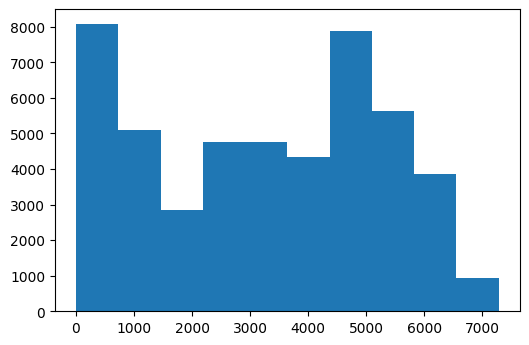

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [2]:
%matplotlib inline
# code so matplotlib charts will show in jupyter
plt.hist(traffic['traffic_volume'])
plt.show()
# quick glance at the distribution of traffic volumes
traffic['traffic_volume'].describe()
#summary statistic for the column 

In [3]:
new_date = pd.to_datetime(traffic['date_time'])

In [36]:
traffic['hours'] = new_date.dt.hour
traffic['month'] = new_date.dt.month
traffic['dayofweek'] = new_date.dt.dayofweek
#created column for hours 
daytime = (traffic['hours']>=6)&(traffic['hours']<20)
nighttime = (traffic['hours']<7)|(traffic['hours']>=19)
day_traffic = traffic[daytime]
night_traffic = traffic[nighttime]
print(traffic['hours'].value_counts().sort_index())
#created two seperate dataframes between night time 
#(7PM to 7AM) and day time (7AM to 7PM)

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
19    1961
20    1979
21    1982
22    1994
23    2040
Name: hours, dtype: int64


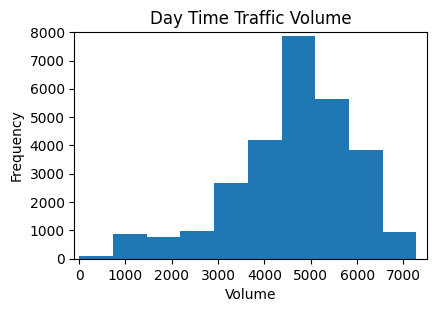

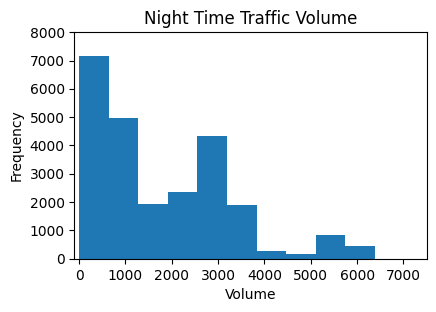

In [8]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.ylim(0,8000)
plt.xlim(-100,7500)
plt.hist(day_traffic['traffic_volume'])
plt.title('Day Time Traffic Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10,3))
plt.subplot(1,2,2)
plt.ylim(0,8000)
plt.xlim(-100,7500)
plt.hist(night_traffic['traffic_volume'])
plt.title('Night Time Traffic Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()
# plt.subplot(1, 2, 1)
# day_traffic['traffic_volume'].plot.hist()
# plt.subplot(1, 2, 2)


In [18]:
print('Day Traffic', '\n',day_traffic['traffic_volume'].describe(),'\n')
print('Night Traffic','\n',night_traffic['traffic_volume'].describe())

Day Traffic 
 count    27925.000000
mean      4611.267574
std       1294.808371
min          0.000000
25%       3992.000000
50%       4761.000000
75%       5521.000000
max       7280.000000
Name: traffic_volume, dtype: float64 

Night Traffic 
 count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


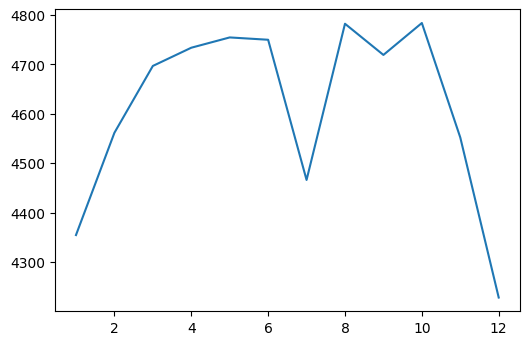

In [35]:
day_traffic['month']
by_month=day_traffic.groupby('month').mean()
plt.plot(by_month['traffic_volume'])


From the line chart, it appears the traffic during daytime drops the lowest around July and December.  This could possibly be due to more drivers leaving for vacation and holidays.

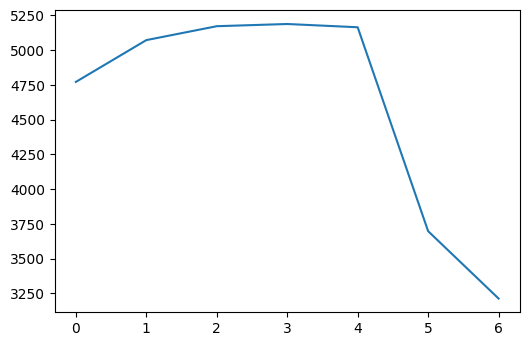

In [37]:
day_traffic['dayofweek']
by_month=day_traffic.groupby('dayofweek').mean()
plt.plot(by_month['traffic_volume'])

0 represents Monday and 6 represents Sunday.  This visualization makes sense since the majority of traffic would come during weekdays.

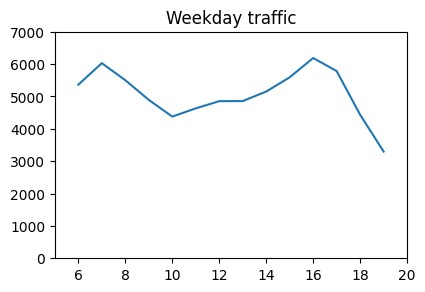

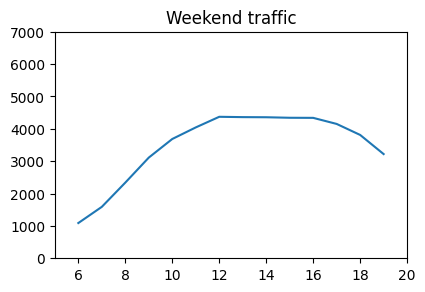

In [47]:
bussiness_days = day_traffic.copy()[day_traffic['dayofweek'] <= 4] # 4 == Friday
weekend = day_traffic.copy()[day_traffic['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hours').mean()
by_hour_weekend = weekend.groupby('hours').mean()

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.ylim(0,7000)
plt.xlim(5,20)
plt.title('Weekday traffic')
plt.show()
plt.figure(figsize=(10,3))
plt.subplot(1,2,2)
plt.ylim(0,7000)
plt.xlim(5,20)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Weekend traffic')
plt.show()

Dissecting traffic based on time of day shows that during weekdays, traffic is higher most hours.  The peak hours of going to and from work create higher traffic count.  On weekends, the traffic is most during the middle of the day, with no peaks as seen on the Weekday traffic chart.

In [49]:
day_traffic['temp'].head()

0    288.28
1    289.36
2    289.58
3    290.13
4    291.14
Name: temp, dtype: float64

In [55]:
day_traffic['temp_f']=(traffic['temp']-273.15)*1.8+32

<ipython-input-55-5865c3e22d4b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
#converted temp column in Kelvin to Fahrenheit
traffic['temp_f'].head()

0    59.234
1    61.178
2    61.574
3    62.564
4    64.382
Name: temp_f, dtype: float64

In [57]:
traffic.corr()['traffic_volume']

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
hours             0.352401
month            -0.002533
dayofweek        -0.149544
temp_f            0.130299
Name: traffic_volume, dtype: float64

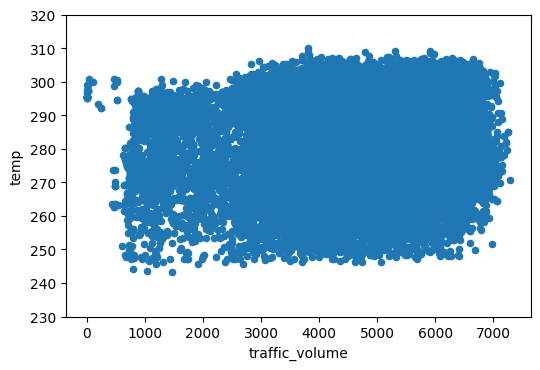

In [64]:
day_traffic.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()


In [65]:
by_weather_main = day_traffic.groupby('weather_main').mean()
by_weather_description = day_traffic.groupby('weather_description').mean()

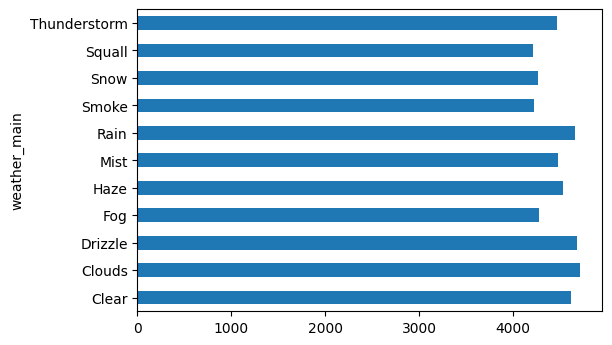

In [71]:
by_weather_main = day_traffic.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()